In [57]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from bs4 import BeautifulSoup
import nltk
import string

%matplotlib inline
# activate plot theme
import qeds
qeds.themes.mpl_style();

In [58]:
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to C:\Users\conor.DESKTOP-
[nltk_data]     ERR8F68\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.
[nltk_data] Downloading package stopwords to C:\Users\conor.DESKTOP-
[nltk_data]     ERR8F68\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.
[nltk_data] Downloading package wordnet to C:\Users\conor.DESKTOP-
[nltk_data]     ERR8F68\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\wordnet.zip.


True

In [349]:
data = pd.read_csv("C:\\Users\\conor.DESKTOP-ERR8F68\\OneDrive\\Documents\\GitHub\\Irish_Economy_Sentiment_Analysis\\csv\\trial2.csv",
                   header = None)

data = data.rename(columns={0: "Title", 1: "Date", 2: "Body"})

data = data.dropna()

data.head()

,Title,Date,Body
0,"Decathlon’s Dublin opening, tobacco battles ov...",2020-06-09,The HSE is investigating if some tobacco compa...
1,Doubling down on a good hand,2020-06-09,"From an Irish perspective, one of the big diff..."
2,Dublin most expensive place to live in euro zo...,2020-06-09,Spiralling accommodation costs have made Dubli...
3,Businesses to seek instant end to lockdown and...,2020-06-08,Ibec chief executive Danny McCoy will call for...
4,Call for zero rate VAT as stores reopen; CRH U...,2020-06-08,The Government should consider introducing a z...


In [350]:
def identify_tokens(dataframe, col):
    """Tokenizes the body of each article; not the title"""
    
    text = dataframe[col]
    tokens = nltk.word_tokenize(text)
    # taken only words (not punctuation)
    token_words = [w for w in tokens if w.isalpha()]
    return token_words

data["title_words"] = data.apply(identify_tokens, args=("Title",), axis=1)
data["body_words"] = data.apply(identify_tokens, args=("Body",), axis=1)

In [351]:
# Convert tokens to lowercase
data["title_words"] = data["title_words"].map(lambda x: list(map(str.lower, x)))
data["body_words"] = data["body_words"].map(lambda x: list(map(str.lower, x)))

In [352]:
stops = set(nltk.corpus.stopwords.words("english"))

def remove_stops(dataframe, col):
    my_list = dataframe[col]
    meaningful_words = [w for w in my_list if not w in stops]
    return (meaningful_words)

data["title_meaningful"] = data.apply(remove_stops, args = ("title_words", ), axis=1)
data["body_meaningful"] = data.apply(remove_stops, args = ("body_words", ), axis=1)

In [369]:
# Move date to index such that date can be accessed as time series
data["Date"]= pd.to_datetime(data["Date"], format = '%Y-%m-%d')
data = data.set_index([pd.DatetimeIndex(data["Date"])])
data = data.sort_index(axis=0, ascending=True)
data = data.drop(columns = "Date")

In [370]:
def wordfreq(dataframe, col, buzzword):
    my_list = dataframe[col]
    wf = my_list.count(buzzword)
    return wf

In [415]:
data_count = data
data_count["buzzword"] = data_count.apply(wordfreq, args = ("body_meaningful", "default"), axis = 1)

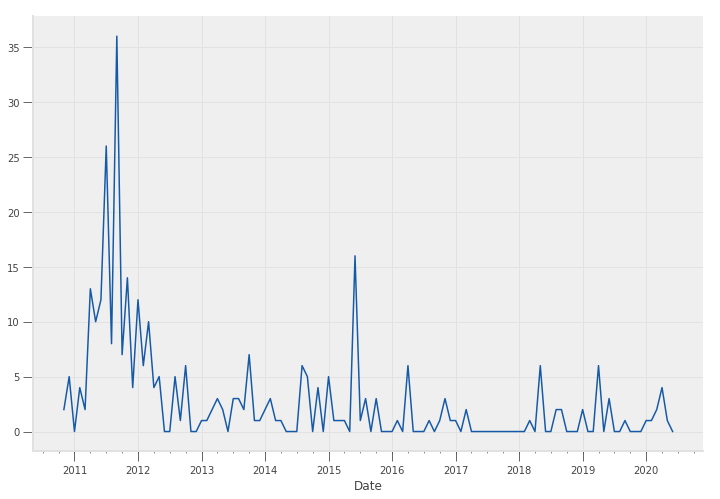

In [416]:
monthly_data = data_count.resample('M')
word_count = monthly_data.sum()
word_count.plot(legend = False, figsize = (12, 8))
plt.show()